Seeding for reproducibility


In [2]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing the dependencies

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Data Curation

In [4]:
# Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Data Processing

In [5]:
type(train_images)

numpy.ndarray

In [6]:
type(train_labels)

numpy.ndarray

In [7]:
print(len(train_images))

60000


In [8]:
print(len(train_labels))

60000


In [9]:
print(train_images[0].shape)

(28, 28)


In [10]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

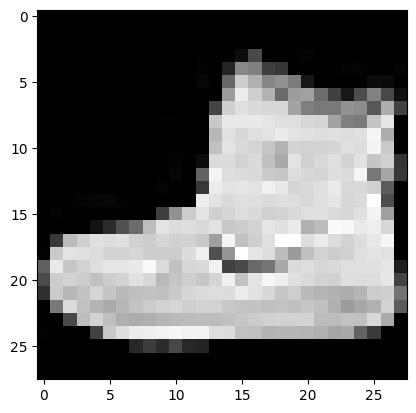

In [11]:
# Display an image from the dataset
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [12]:
print(train_labels[0])

9


class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [13]:
# Normalize pixel values to be between 0 and 1
train_images,test_images = train_images/255.0 , test_images / 255.0

In [14]:
# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

Convolutional Neural Network

In [15]:
# Build the Convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model Training

In [17]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7486 - loss: 0.6955 - val_accuracy: 0.8689 - val_loss: 0.3637
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8786 - loss: 0.3368 - val_accuracy: 0.8864 - val_loss: 0.3209
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8974 - loss: 0.2821 - val_accuracy: 0.8923 - val_loss: 0.3014
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9091 - loss: 0.2469 - val_accuracy: 0.8949 - val_loss: 0.2898
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9182 - loss: 0.2189 - val_accuracy: 0.8937 - val_loss: 0.2930


Model Evaluation

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8937 - loss: 0.2930

Test accuracy: 0.8937000036239624


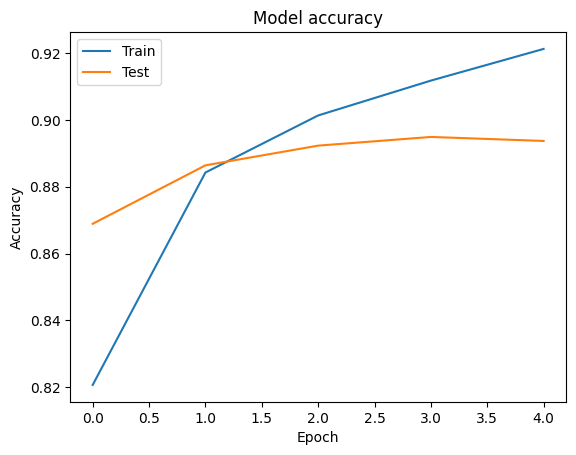

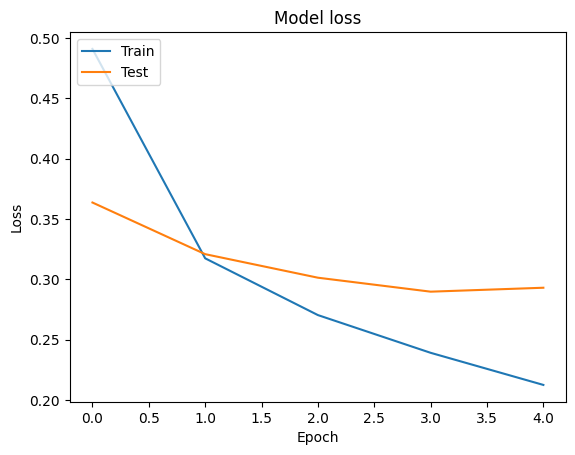

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [20]:
model.save('trained_fashion_mnist_model.h5')

In [26]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("/content/trained_fashion_mnist_model.h5")  # Update the correct path

# Class labels for Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def preprocess_image(image_path):
    """Preprocess the image to match Fashion MNIST input format."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    img = cv2.resize(img, (28, 28))  # Resize to 28x28
    img = img / 255.0  # Normalize to [0,1]
    img = img.reshape(1, 28, 28, 1)  # Reshape for model input
    return img

def predict_category(image_path):
    """Predict the category of the uploaded image."""
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    return class_names[predicted_class]

# Example usage
image_path = input("Enter the image path: ")  # Let user enter the image path
predicted_label = predict_category(image_path)
print(f"Predicted Category: {predicted_label}")


Enter the image path: /content/processed_image.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Predicted Category: Pullover


Saving download (1).jpg to download (1).jpg

Processing image: download (1).jpg


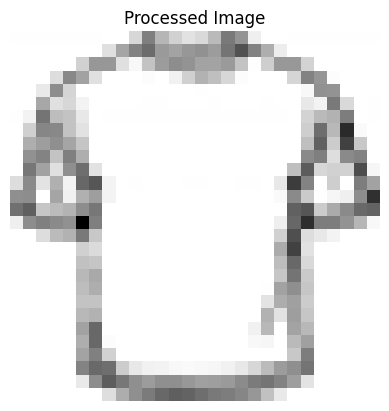

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Image shape: (28, 28, 1)
Pixel values range: 0.4549019607843137 to 1.0


In [25]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import io

# Function to preprocess image
def preprocess_image(image_path):
    # Open image
    image = Image.open(image_path)

    # Convert to grayscale
    image = image.convert('L')

    # Resize to 28x28 pixels
    image = image.resize((28, 28))

    # Convert to NumPy array
    image_array = np.array(image)

    # Normalize pixel values (0-255 to 0-1)
    image_array = image_array / 255.0

    # Reshape to match Fashion-MNIST format (28, 28, 1)
    image_array = image_array.reshape(28, 28, 1)

    return image_array, image

# Function to upload, process, and download the image
def upload_process_download():
    # Upload file
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"\nProcessing image: {filename}")

        # Preprocess image
        processed_array, processed_image = preprocess_image(io.BytesIO(uploaded[filename]))

        # Display the processed image
        plt.imshow(processed_array.reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title("Processed Image")
        plt.show()

        # Save the processed image
        processed_image.save("processed_image.png")

        # Download the processed image
        files.download("processed_image.png")

        # Print shape and pixel range
        print(f"Image shape: {processed_array.shape}")
        print(f"Pixel values range: {processed_array.min()} to {processed_array.max()}")

        return processed_array

# Run the function
processed_image = upload_process_download()
